In [2]:
# ----------------------------
# 1. Import Libraries
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for prettier plots
sns.set_style("whitegrid")


In [4]:
# ----------------------------
# 2. Load Cleaned Data
# ----------------------------

enrol = pd.read_csv(
    r"C:\Users\Tanaya\Downloads\aadhaar-enrollment-main\aadhaar-enrollment-main\aadhaar-enrollment\data\processed\enrol_cleaned.csv"
)

demo = pd.read_csv(
    r"C:\Users\Tanaya\Downloads\aadhaar-enrollment-main\aadhaar-enrollment-main\aadhaar-enrollment\data\processed\demo_cleaned.csv"
)


print("Enrollment dataset shape:", enrol.shape)
print("Demographic update dataset shape:", demo.shape)



Enrollment dataset shape: (8037, 7)
Demographic update dataset shape: (13601, 6)


In [5]:
# ----------------------------
# Create total enrollment column
# ----------------------------
enrol['total_enrolment'] = (
    enrol['age_0_5'] +
    enrol['age_5_17'] +
    enrol['age_18_greater']
)

print(enrol[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolment']].head())


   age_0_5  age_5_17  age_18_greater  total_enrolment
0        3         0               0                3
1        1         0               0                1
2        1         1               0                2
3        1         0               0                1
4        1         0               0                1


In [6]:
# ----------------------------
# 3. Quick Overview of Enrollment Data
# ----------------------------
print("\nEnrollment dataset info:")
print(enrol.info())

print("\nEnrollment dataset summary statistics:")
print(enrol.describe())

print("\nSample rows:")
print(enrol.head())



Enrollment dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8037 entries, 0 to 8036
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             2851 non-null   object
 1   state            8037 non-null   object
 2   district         8037 non-null   object
 3   pincode          8037 non-null   int64 
 4   age_0_5          8037 non-null   int64 
 5   age_5_17         8037 non-null   int64 
 6   age_18_greater   8037 non-null   int64 
 7   total_enrolment  8037 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 502.4+ KB
None

Enrollment dataset summary statistics:
             pincode      age_0_5     age_5_17  age_18_greater  \
count    8037.000000  8037.000000  8037.000000     8037.000000   
mean   411579.216374     3.473435     1.117208        0.155655   
std       836.826361    10.779462     4.955772        1.085235   
min    402301.000000     0.000000     0.000000        0.0

In [7]:
# Check actual column names in enrollment dataset
print(enrol.columns)


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'total_enrolment'],
      dtype='object')


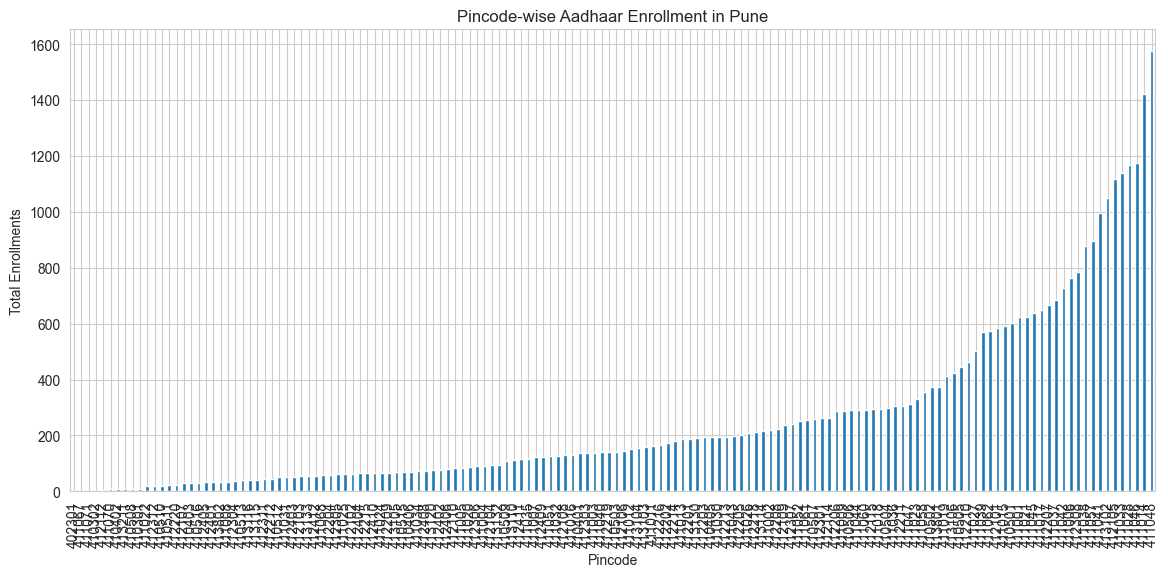

In [19]:
# ----------------------------
# 8. Pincode-wise Enrollment Gap
# ----------------------------

pincode_enrol = enrol.groupby('pincode')['total_Enrolments'].sum().sort_values()

plt.figure(figsize=(14,6))
pincode_enrol.plot(kind='bar')
plt.title("Pincode-wise Aadhaar Enrollment in Pune")
plt.ylabel("Total Enrollments")
plt.xlabel("Pincode")
plt.xticks(rotation=90)
plt.show()


In [15]:
print(demo.columns.tolist())
print(enrol.columns.tolist())


['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17']
['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolment', 'total_Enrolments']


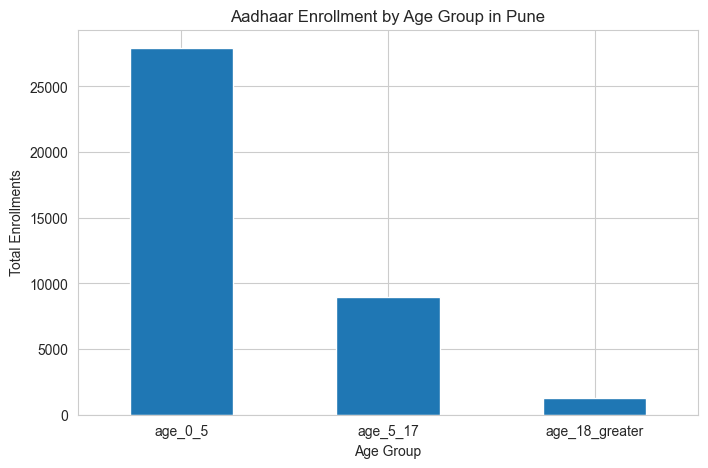

In [14]:
# ----------------------------
# Age-wise Aadhaar Enrollment Gap
# ----------------------------

age_totals = enrol[['age_0_5','age_5_17','age_18_greater']].sum()

plt.figure(figsize=(8,5))
age_totals.plot(kind='bar')
plt.title("Aadhaar Enrollment by Age Group in Pune")
plt.ylabel("Total Enrollments")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.show()
